# Clustering Model Solution

In [92]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [93]:
# Loading Data
steam_data = pd.read_csv('Datasets/cleaned_steam_data.csv')
reviews = pd.read_csv('Datasets/reviews_processed.csv')
genres = pd.read_csv('Datasets/genres.csv')

In [94]:
steam_data.head(2)

,appid,name,average_playtime,owners,rating,Action,Adventure,Animation & Modeling,Casual,Design & Illustration,...,Software Training,Sports,Strategy,Utilities,Video Production,Violent,multiplayer,local,coop,singleplayer
0,10,Counter-Strike,17612,10000000-20000000,97.388815,1,0,0,0,0,...,0,0,0,0,0,0,True,True,False,False
1,20,Team Fortress Classic,277,5000000-10000000,83.978740,1,0,0,0,0,...,0,0,0,0,0,0,True,True,False,False


In [95]:
reviews.head(2)

,app_name,count,mean,positive_rate,weighted_score
0,神明的一天世界-God's One Day World,14,0.571429,0.785714,0.659272
1,! That Bastard Is Trying To Steal Our Gold !,26,-0.384615,0.307692,0.378996


In [96]:
reviews.describe()

,count,mean,positive_rate,weighted_score
count,9363.000000,9363.000000,9300.000000,9300.000000
mean,665.798569,0.454357,0.732104,0.663343
std,3187.723508,0.428824,0.206585,0.147244
min,1.000000,-1.000000,0.029412,0.108476
25%,18.000000,0.200000,0.608905,0.571727
50%,58.000000,0.555556,0.778470,0.683278
75%,244.000000,0.788235,0.894737,0.772497
max,88973.000000,1.000000,1.000000,0.967521


In [97]:
print("steam data: ",len(steam_data))
print("reviews: ",len(reviews))

steam data:  26564
reviews:  9363


## Merging Reviews with Steam Data

In [98]:
data = steam_data.merge(reviews, left_on="name", right_on="app_name", how="left")
data.describe()

,appid,average_playtime,rating,Action,Adventure,Animation & Modeling,Casual,Design & Illustration,Early Access,Education,...,Software Training,Sports,Strategy,Utilities,Video Production,Violent,count,mean,positive_rate,weighted_score
count,2.656400e+04,26564.000000,26564.000000,26564.000000,26564.000000,26564.000000,26564.000000,26564.000000,26564.000000,26564.000000,...,26564.000000,26564.000000,26564.000000,26564.000000,26564.000000,26564.000000,7420.000000,7420.000000,7365.000000,7365.000000
mean,5.921365e+05,149.890717,71.390776,0.444813,0.368845,0.002936,0.377503,0.003237,0.108643,0.001882,...,0.001129,0.049578,0.192102,0.005421,0.001393,0.031321,636.391105,0.460500,0.735704,0.665434
std,2.502956e+05,1824.209705,23.336491,0.496954,0.482501,0.054109,0.484772,0.056808,0.311197,0.043345,...,0.033587,0.217076,0.393960,0.073428,0.037296,0.174186,3323.773370,0.430534,0.206576,0.146663
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.035714,0.171425
25%,3.978925e+05,0.000000,58.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.219806,0.615385,0.572602
50%,5.933350e+05,0.000000,75.952526,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,0.567093,0.785714,0.687998
75%,7.937175e+05,0.000000,89.285714,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,221.000000,0.793129,0.897810,0.774082
max,1.069460e+06,190625.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,88973.000000,1.000000,1.000000,0.967521


In [99]:
data.head()

,appid,name,average_playtime,owners,rating,Action,Adventure,Animation & Modeling,Casual,Design & Illustration,...,Violent,multiplayer,local,coop,singleplayer,app_name,count,mean,positive_rate,weighted_score
0,10,Counter-Strike,17612,10000000-20000000,97.388815,1,0,0,0,0,...,0,True,True,False,False,Counter-Strike,12353.0,0.937181,0.968591,0.941109
1,20,Team Fortress Classic,277,5000000-10000000,83.978740,1,0,0,0,0,...,0,True,True,False,False,Team Fortress Classic,1542.0,0.678340,0.839170,0.801963
2,30,Day of Defeat,187,5000000-10000000,89.564761,1,0,0,0,0,...,0,True,False,False,False,Day of Defeat,1030.0,0.819417,0.909709,0.858964
3,40,Deathmatch Classic,258,5000000-10000000,82.662338,1,0,0,0,0,...,0,True,True,False,False,Deathmatch Classic,457.0,0.702407,0.851204,0.795670
4,50,Half-Life: Opposing Force,624,5000000-10000000,94.799567,1,0,0,0,0,...,0,True,False,False,True,Half-Life: Opposing Force,1743.0,0.925416,0.962708,0.913786


In [100]:
data.isnull().sum()

appid                        0
name                         0
average_playtime             0
owners                       0
rating                       0
Action                       0
Adventure                    0
Animation & Modeling         0
Casual                       0
Design & Illustration        0
Early Access                 0
Education                    0
Free to Play                 0
Gore                         0
Indie                        0
Massively Multiplayer        0
Nudity                       0
RPG                          0
Racing                       0
Sexual Content               0
Simulation                   0
Software Training            0
Sports                       0
Strategy                     0
Utilities                    0
Video Production             0
Violent                      0
multiplayer                  0
local                        0
coop                         0
singleplayer                 0
app_name                 19144
count   

In [101]:
data = data.fillna(0)
data.isnull().sum()

appid                    0
name                     0
average_playtime         0
owners                   0
rating                   0
Action                   0
Adventure                0
Animation & Modeling     0
Casual                   0
Design & Illustration    0
Early Access             0
Education                0
Free to Play             0
Gore                     0
Indie                    0
Massively Multiplayer    0
Nudity                   0
RPG                      0
Racing                   0
Sexual Content           0
Simulation               0
Software Training        0
Sports                   0
Strategy                 0
Utilities                0
Video Production         0
Violent                  0
multiplayer              0
local                    0
coop                     0
singleplayer             0
app_name                 0
count                    0
mean                     0
positive_rate            0
weighted_score           0
dtype: int64

In [102]:
data.tail()

,appid,name,average_playtime,owners,rating,Action,Adventure,Animation & Modeling,Casual,Design & Illustration,...,Violent,multiplayer,local,coop,singleplayer,app_name,count,mean,positive_rate,weighted_score
26559,1065230,Room of Pandora,0,0-20000,100.000000,0,1,0,1,0,...,0,False,False,False,True,0,0.0,0.0,0.0,0.0
26560,1065570,Cyber Gun,0,0-20000,88.888889,1,1,0,0,0,...,0,False,False,False,True,0,0.0,0.0,0.0,0.0
26561,1065650,Super Star Blast,0,0-20000,0.000000,1,0,0,1,0,...,0,True,False,True,True,0,0.0,0.0,0.0,0.0
26562,1066700,New Yankee 7: Deer Hunters,0,0-20000,100.000000,0,1,0,1,0,...,0,False,False,False,True,0,0.0,0.0,0.0,0.0
26563,1069460,Rune Lord,0,0-20000,100.000000,0,1,0,1,0,...,0,False,False,False,True,0,0.0,0.0,0.0,0.0


## Training Models

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import silhouette_score 
from kneed import KneeLocator

In [104]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(steam_data[['average_playtime', 'rating']])
# scaled_data


In [105]:
features = genres["genres"].tolist()
features.append('average_playtime')
features.append('rating')
features.append('local')
features.append('coop')
features.append('multiplayer')
features.append('singleplayer')
# features

### Choosing the number of clusters

#### Testing without review scores

In [106]:
kmeans_args = {
    "random_state": 42
}

sum_sqr_dist = []
silhouette_coeff = []
for k in range (1, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_args)
    kmeans.fit(steam_data[features])
    sum_sqr_dist.append(kmeans.inertia_)
    if k > 1:
        score = silhouette_score(steam_data[features], kmeans.labels_)
        silhouette_coeff.append(score)

#### Testing with review scores

In [108]:
features.append('weighted_score')

sum_sqr_dist_weighted = []
silhouette_coeff_weighted = []
for k in range (1, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_args)
    kmeans.fit(data[features], sample_weight=data["weighted_score"])
    sum_sqr_dist_weighted.append(kmeans.inertia_)
    if k > 1:
        score = silhouette_score(data[features], kmeans.labels_)
        silhouette_coeff_weighted.append(score)

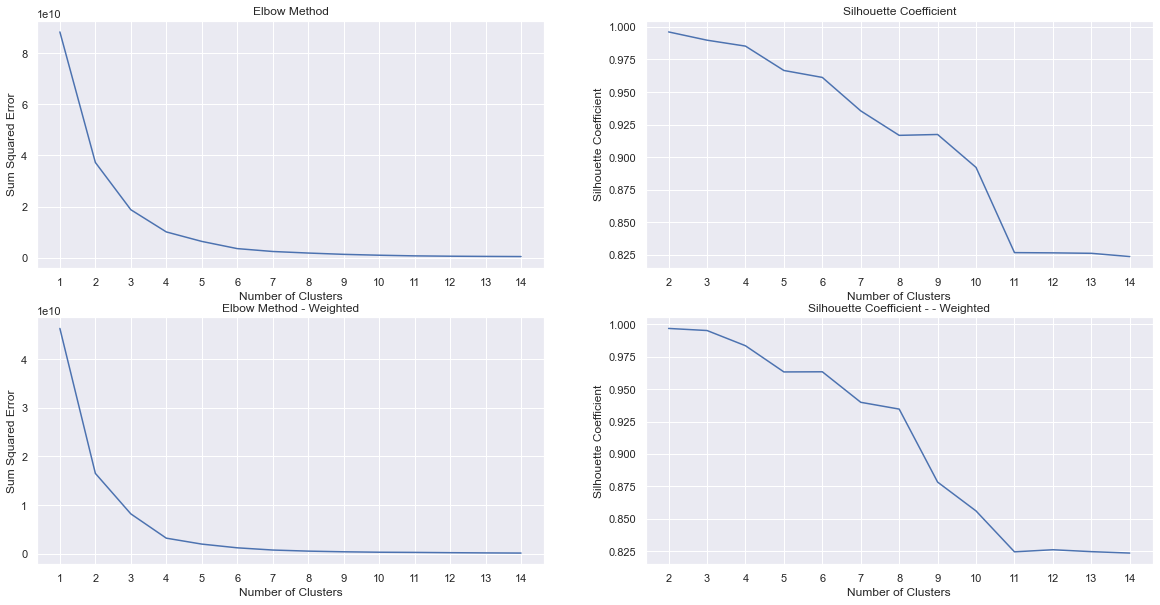

In [109]:
sns.set_style('darkgrid')

fig, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.lineplot(x=range(1, 15), y=sum_sqr_dist, ax=axes[0, 0])
axes[0, 0].set_xticks(range(1, 15))
axes[0, 0].title.set_text("Elbow Method")
axes[0, 0].set_xlabel("Number of Clusters")
axes[0, 0].set_ylabel("Sum Squared Error")
sns.lineplot(x=range(2, 15), y=silhouette_coeff, ax=axes[0, 1])
axes[0, 1].set_xticks(range(2, 15))
axes[0, 1].title.set_text("Silhouette Coefficient")
axes[0, 1].set_xlabel("Number of Clusters")
axes[0, 1].set_ylabel("Silhouette Coefficient")

sns.lineplot(x=range(1, 15), y=sum_sqr_dist_weighted, ax=axes[1, 0])
axes[1, 0].set_xticks(range(1, 15))
axes[1, 0].title.set_text("Elbow Method - Weighted")
axes[1, 0].set_xlabel("Number of Clusters")
axes[1, 0].set_ylabel("Sum Squared Error")
sns.lineplot(x=range(2, 15), y=silhouette_coeff_weighted, ax=axes[1, 1])
axes[1, 1].set_xticks(range(2, 15))
axes[1, 1].title.set_text("Silhouette Coefficient - - Weighted")
axes[1, 1].set_xlabel("Number of Clusters")
axes[1, 1].set_ylabel("Silhouette Coefficient")

plt.show()


In [110]:
kneelocator = KneeLocator(
    range(1, 15), sum_sqr_dist, curve="convex", direction="decreasing"
)
kneelocator_weighted = KneeLocator(
    range(1, 15), sum_sqr_dist_weighted, curve="convex", direction="decreasing"
)
print("without weights: ", kneelocator.elbow)
print("with weights: ", kneelocator_weighted.elbow)

without weights:  4
with weights:  4


After observing the results of each cluster using the elbow method and the silhouette coefficient, we can see that around 4 clusters is the best number of clusters.

In [113]:
kmeans = KMeans(n_clusters=4)
model = kmeans.fit_predict(data[features], sample_weight=data["weighted_score"])

# len(model)

26564

In [119]:
data["kmeans_cluster"] = model
data.head()

,appid,name,average_playtime,owners,rating,Action,Adventure,Animation & Modeling,Casual,Design & Illustration,...,multiplayer,local,coop,singleplayer,app_name,count,mean,positive_rate,weighted_score,kmeans_cluster
0,10,Counter-Strike,17612,10000000-20000000,97.388815,1,0,0,0,0,...,True,True,False,False,Counter-Strike,12353.0,0.937181,0.968591,0.941109,3
1,20,Team Fortress Classic,277,5000000-10000000,83.978740,1,0,0,0,0,...,True,True,False,False,Team Fortress Classic,1542.0,0.678340,0.839170,0.801963,0
2,30,Day of Defeat,187,5000000-10000000,89.564761,1,0,0,0,0,...,True,False,False,False,Day of Defeat,1030.0,0.819417,0.909709,0.858964,0
3,40,Deathmatch Classic,258,5000000-10000000,82.662338,1,0,0,0,0,...,True,True,False,False,Deathmatch Classic,457.0,0.702407,0.851204,0.795670,0
4,50,Half-Life: Opposing Force,624,5000000-10000000,94.799567,1,0,0,0,0,...,True,False,False,True,Half-Life: Opposing Force,1743.0,0.925416,0.962708,0.913786,0


In [166]:
cluster = data[data["kmeans_cluster"] == 0]

model = NearestNeighbors(n_neighbors=10).fit(cluster[features])
neighbors = model.kneighbors(X=cluster[features], n_neighbors=10, return_distance=True)

In [188]:
def get_recommendations(name, type):
    # Getting Cluster
    if type == 1:
        cluster_num = data[data["name"] == name]['kmeans_cluster']
        cluster = data[data["kmeans_cluster"] == int(cluster_num)]
    else:
        cluster_num = data[data["name"] == name]['genres_cluster']
        cluster = data[data["genres_cluster"] == int(cluster_num)]
    # Getting neighbors
    model = NearestNeighbors(n_neighbors=10).fit(cluster[features])
    neighbors = model.kneighbors(X=cluster[features], n_neighbors=10, return_distance=True)
    
    # Getting games
    cluster.reset_index()
    id = cluster.index[cluster["name"] == name].tolist()
    indices = neighbors[1][id[0]].tolist()
    print(neighbors[0][id[0]].tolist())
    return cluster.iloc[indices]


In [ ]:
get_recommendations("Brawlhalla", 1)

After inspecting the results using 4 clusters, it looks like the recommendations are not very accurate

In [190]:
kmeans_genres = KMeans(n_clusters=22)
model_genres = kmeans_genres.fit_predict(data[genres["genres"].tolist()], sample_weight=data["weighted_score"])

In [205]:
data['genres_cluster'] = model_genres
cluster2 = data[data["genres_cluster"] == 1]

model2 = NearestNeighbors(n_neighbors=10, algorithm="brute").fit(cluster2[genres["genres"].tolist()])
neighbors_genres = model2.kneighbors(X=cluster2[genres["genres"].tolist()], n_neighbors=10, return_distance=True)

In [212]:
id = cluster2.index[cluster2["name"] == "Team Fortress Classic"].tolist()
print(id)
indices = neighbors_genres[1][id[0]].tolist()
cluster2.iloc[indices]
# cluster2
neighbors_genres

[1]


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[1514,  615, 1788, ...,  612, 1215, 1205],
        [1514,  615, 1788, ...,  612, 1215, 1205],
        [1514,  615, 1788, ...,  612, 1215, 1205],
        ...,
        [1514,  615, 1788, ...,  612, 1215, 1205],
        [1784,  588,  730, ..., 1887, 1379, 1937],
        [ 852, 1872,  847, ...,  857,  876, 1548]], dtype=int64))

In [172]:
get_recommendations("Half-Life 2: Lost Coast", neighbors_genres)

[0.0, 2.4539515532547895, 2.970423426815875, 3.400717536122597, 3.42723707670455, 3.6063642640878144, 3.773464927785915, 3.8536786676270505, 4.206796816650715, 4.37938473169095]


,appid,name,average_playtime,owners,rating,Action,Adventure,Animation & Modeling,Casual,Design & Illustration,...,local,coop,singleplayer,app_name,count,mean,positive_rate,weighted_score,kmeans_cluster,genres_cluster
14,340,Half-Life 2: Lost Coast,46,10000000-20000000,85.006615,1,0,0,0,0,...,False,False,True,Half-Life 2: Lost Coast,2275.0,0.671209,0.835604,0.802854,0,0
5302,361850,Portal of Evil: Stolen Runes Collector's Edition,169,100000-200000,89.473684,0,1,0,1,0,...,False,False,True,Portal of Evil: Stolen Runes Collector's Edition,41.0,0.902439,0.951220,0.804752,0,4
4781,347950,Palace of Cards,9,20000-50000,57.377049,0,0,0,1,0,...,False,True,False,0,0.0,0.000000,0.000000,0.000000,0,0
117,3920,Sid Meier's Pirates!,296,500000-1000000,93.189838,0,0,0,0,0,...,False,False,True,Sid Meier's Pirates!,1400.0,0.911429,0.955714,0.904248,0,12
881,47700,Command & Conquer 4: Tiberian Twilight,160,200000-500000,18.086124,0,0,0,0,0,...,False,False,True,0,0.0,0.000000,0.000000,0.000000,0,4
11833,552960,Fastigium,0,0-20000,53.658537,1,1,0,1,0,...,False,False,True,0,0.0,0.000000,0.000000,0.000000,0,0
5440,365300,Transmissions: Element 120,84,500000-1000000,94.047760,1,0,0,0,0,...,False,False,True,Transmissions: Element 120,2248.0,0.888790,0.944395,0.900872,0,0
448,20710,Mr. Robot,14,20000-50000,82.089552,1,0,0,0,0,...,False,False,True,Mr. Robot,46.0,0.652174,0.826087,0.723762,0,0
11936,555570,Infestation: The New Z,376,5000000-10000000,49.149569,1,0,0,0,0,...,False,True,False,Infestation: The New Z,2233.0,-0.235110,0.382445,0.393981,0,12
449,20820,Shatter,31,200000-500000,93.768257,1,0,0,0,0,...,False,False,True,Shatter,637.0,0.877551,0.938776,0.875983,0,0
